In [2]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")
Date = data[:,0]
Temp = data[:,1] 

# PLOT TO VERIFY FILE READ I
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date,Temp,s=5,c='g',alpha=0.9)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

ColDefs(
    name = 'APSTAR_ID'; format = '45A'
    name = 'TARGET_ID'; format = '34A'
    name = 'ASPCAP_ID'; format = '46A'
    name = 'FILE'; format = '38A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'I'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '140A'
    name = 'SURVEY'; format = '14A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    n

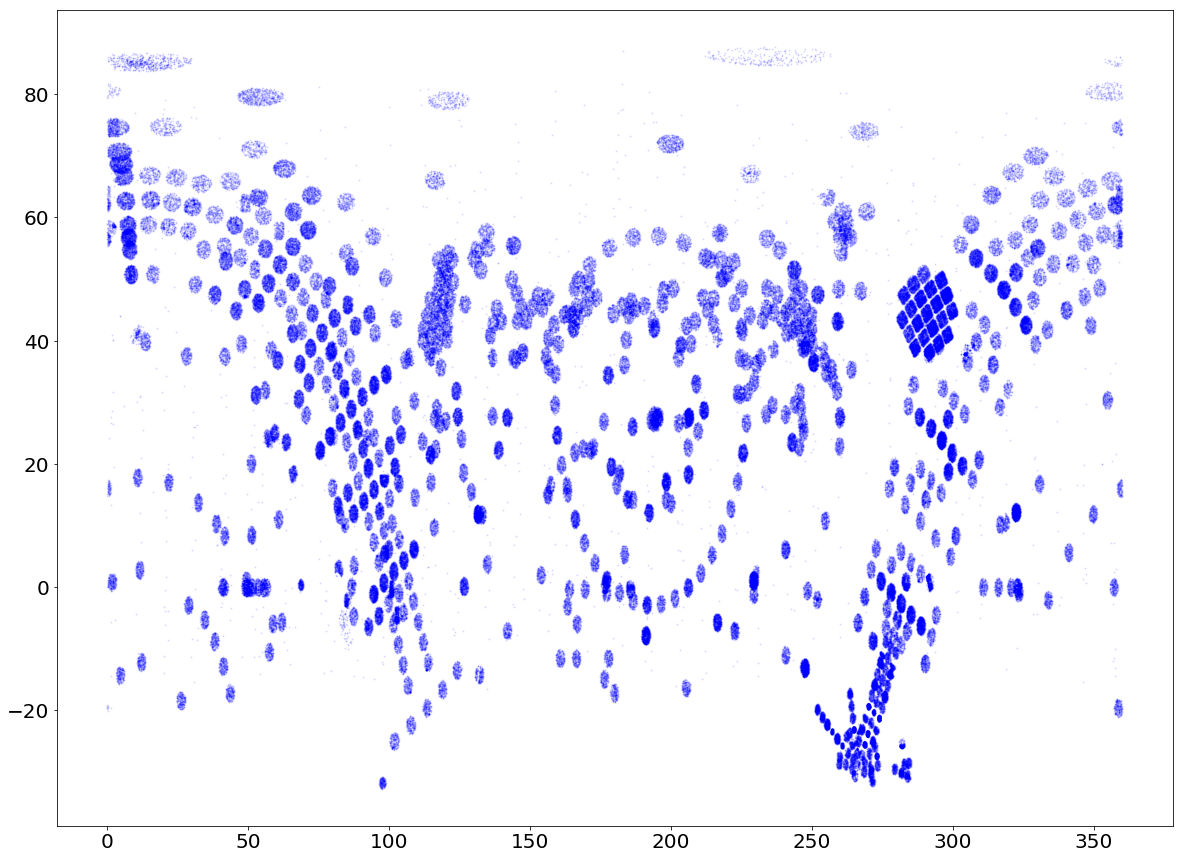

In [57]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['ra'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

## Problem 1:

The Amplitude of The Function 9.671579546092742
The Period 6.281548878661168
The Phase Shift -559.2888819632474
The Shift in Y axis 9.051351925486001
The overall average temperature in Munich 9.261252084167237


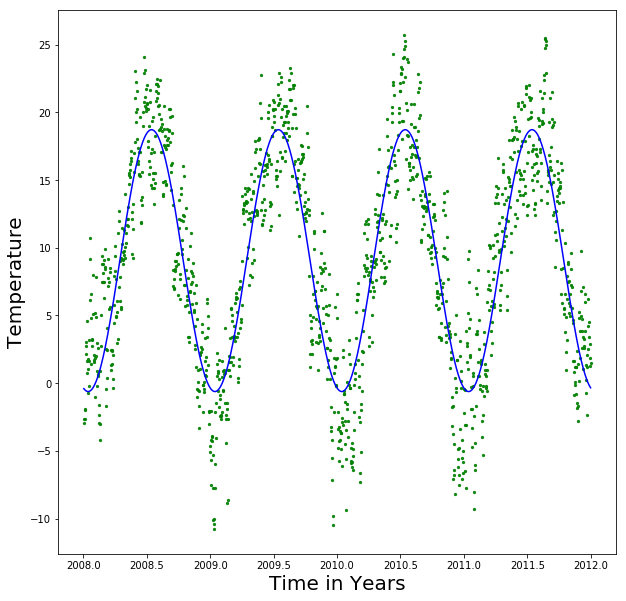

In [88]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt


# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")

Date = data[:,0]
Temp = data[:,1] 


# MASK DATA 

gd1 = (Date > 2008) & (Temp > -30) &\
     (Date < 2012) &(Temp < 30)

good1 = np.where(gd1)[0]

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d


fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date[gd1],Temp[gd1],s=5,c='g',alpha=0.9)

x = data[:,0]
y = data[:,1] 

popt, pcov = opt.curve_fit(cosfit, x, y,p0=[10,6,4,0])
# print(*popt)

# The physical meaning of the parameters
print("The Amplitude of The Function",popt[0])
print("The Period", popt[1])
print("The Phase Shift", popt[2])
print("The Shift in Y axis", popt[3])
print("The overall average temperature in Munich", np.mean(Temp[gd1]))

plt.plot(x[gd1],cosfit(x[gd1], *popt), c='b')

ax1.xaxis.set_tick_params(labelsize=10)
ax1.yaxis.set_tick_params(labelsize=10)


plt.xlabel("Time in Years",size=20)
plt.ylabel("Temperature",size=20)

plt.show()




## Problem 2:

In [89]:
# LINEAR MC FIT
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

# To run example
#popt,pcov  = mcFit(data['X'], data['Y'], data['X_ERR'],data['Y_ERR'])

# 3 PARAMETER MC FIT
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):
    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y

        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])
    
    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]
# To run example
#popt,pcov = mcFit(poly2, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)

# 4 PARAMETER MC FIT
def mcFit4param(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]
# To run example
#popt,pcov = mcFit4param(cosfit, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)

## Plot a) stars with only $-1$$ < GLAT <1$

The best fit values of the parameters
The Slope 0.0014498499886408875 2.360472819096351e-06
Intercept with y axis -4.536756574306559 0.010406226030476235


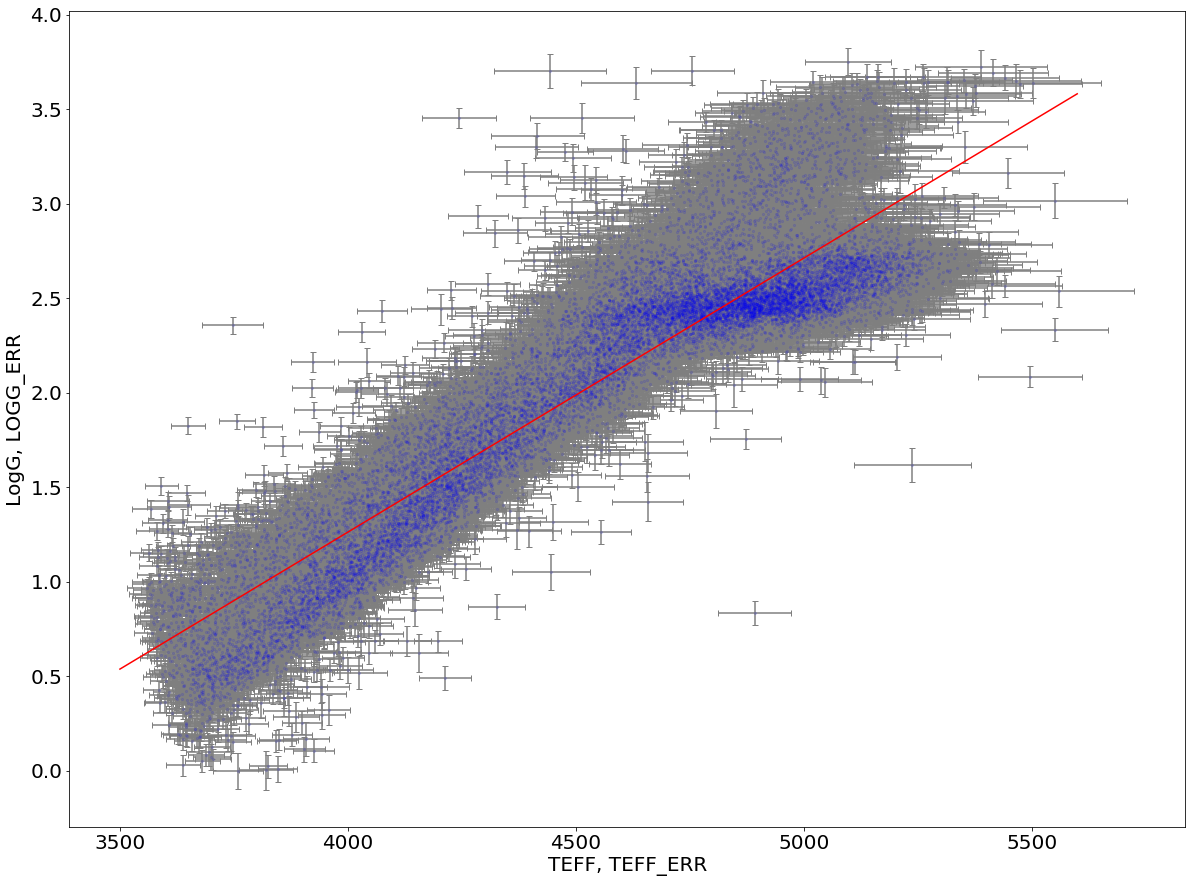

In [96]:
# READ IN FITS FILES

star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
# print(star_hdus[1].columns)
star_hdus.close()


# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data


T= star['TEFF']
L= star['LogG'] 

gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > -1) &\
     (star['GLAT'] < 1)&\
     (T > 2500) & (L > 0)&\
     (T < 7000) &(L < 30)


good = np.where(gd)[0]

#To define the mcfitline
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

# To run example
popt,pcov  = mcFitLine(star['TEFF'][gd],star['LogG'][gd],star['TEFF_ERR'][gd],star['LOGG_ERR'][gd])


#Plot details:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

#Which function fits the data best?
Teffx = np.arange(3500,5600,1)
ax.plot(Teffx, linear(Teffx,*popt), c='red')

ax.errorbar(star['TEFF'][gd],star['LogG'][gd], xerr=star['TEFF_ERR'][gd],yerr=star['LOGG_ERR'][gd],c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.scatter(star['TEFF'][gd],star['LogG'][gd],s=5,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.xlabel("TEFF, TEFF_ERR",size=20)
plt.ylabel("LogG, LOGG_ERR",size=20)

#The best fit values of the parameter
print("The best fit values of the parameters")
print("The Slope",popt[0], pcov[0])
print("Intercept with y axis",popt[1], pcov[1])
plt.show()

## Plot b) Stars with $GLAT < -10$ OR $GLAT >$$10$

The best fit values for Poly2
Param 1 -0.06097771275146381 0.0012281723112430854
Param 2 -0.2722281080013039 0.0011034728165358976
Param 3 0.0489760698128731 0.00022705050104682257
The best fit values for Linear
Param 1 -0.2023195999874591 0.0008402965638883651
Param 2 0.050468853747921816 0.00023154261374237105


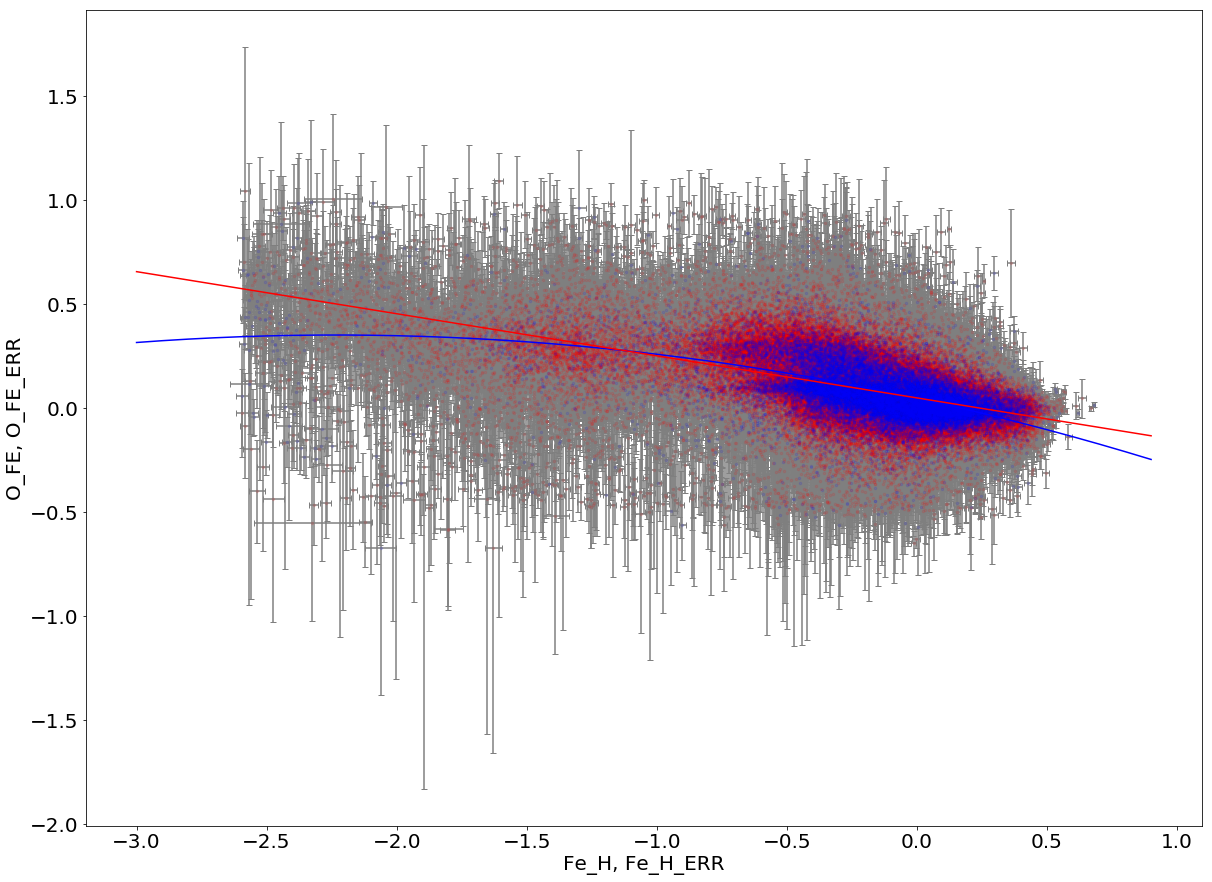

In [131]:
# READ IN FITS FILES

star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
# print(star_hdus[1].columns)
star_hdus.close()


# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters


F= star['Fe_H']
O= star['O_FE']

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > 10)&\
     (F > -9000) & (O > -9000)&\
     (F < 3000) &(O < 15000)

gd1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < -10)&\
     (F > -9000) & (O > -9000)&\
     (F < 3000) &(O < 15000)

good = np.where(gd)[0]

#To run example
p0= [-1,1,0]
popt,pcov = mcFit3param(poly2, star['Fe_H'][gd], star['O_FE'][gd], star['Fe_H_ERR'][gd],star['O_FE_ERR'][gd], p0)
popt1,pcov1 = mcFitLine(star['Fe_H'][gd], star['O_FE'][gd], star['Fe_H_ERR'][gd],star['O_FE_ERR'][gd])

#Adding errorbars
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][gd],star['O_FE'][gd],s=6,c='r',alpha=0.1)
ax.scatter(star['Fe_H'][gd1],star['O_FE'][gd1],s=6,c='b',alpha=0.1)
ax.errorbar(star['Fe_H'][gd],star['O_FE'][gd], xerr=star['Fe_H_ERR'][gd],yerr=star['O_FE_ERR'][gd],c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.errorbar(star['Fe_H'][gd1],star['O_FE'][gd1], xerr=star['Fe_H_ERR'][gd1],yerr=star['O_FE_ERR'][gd1],c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
#Plot details:
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.xlabel("Fe_H, Fe_H_ERR",size=20)
plt.ylabel("O_FE, O_FE_ERR",size=20)

#Which function fits the data best:
#1
Fe_Hx = np.arange(-3,1,0.1)
ax.plot(Fe_Hx, poly2(Fe_Hx,*popt), c='b')
#2
Fe_Hx = np.arange(-3,1,0.1)
ax.plot(Fe_Hx, linear(Fe_Hx,*popt1), c='r')


#The best fit values of the parameter
print("The best fit values for Poly2")
print("Param 1",popt[0], pcov[0])
print("Param 2",popt[1], pcov[1])
print("Param 3",popt[2], pcov[2])


print("The best fit values for Linear")
print("Param 1",popt1[0], pcov1[0])
print("Param 2",popt1[1], pcov1[1])
plt.show()

## Plot c): stars with only $-2$$< GLAT <2$

The best fit values for Poly2
Param 1 0.0914164887216792 0.004245536138490693
Param 2 -0.10722170041924454 0.0010135191018601107
Param 3 0.04157892552569345 0.00037123721931330424
The best fit values for Linear
Param 1 -0.1313966914951752 0.0009886308618438139
Param 2 0.04718626768548487 0.0002236186924050515


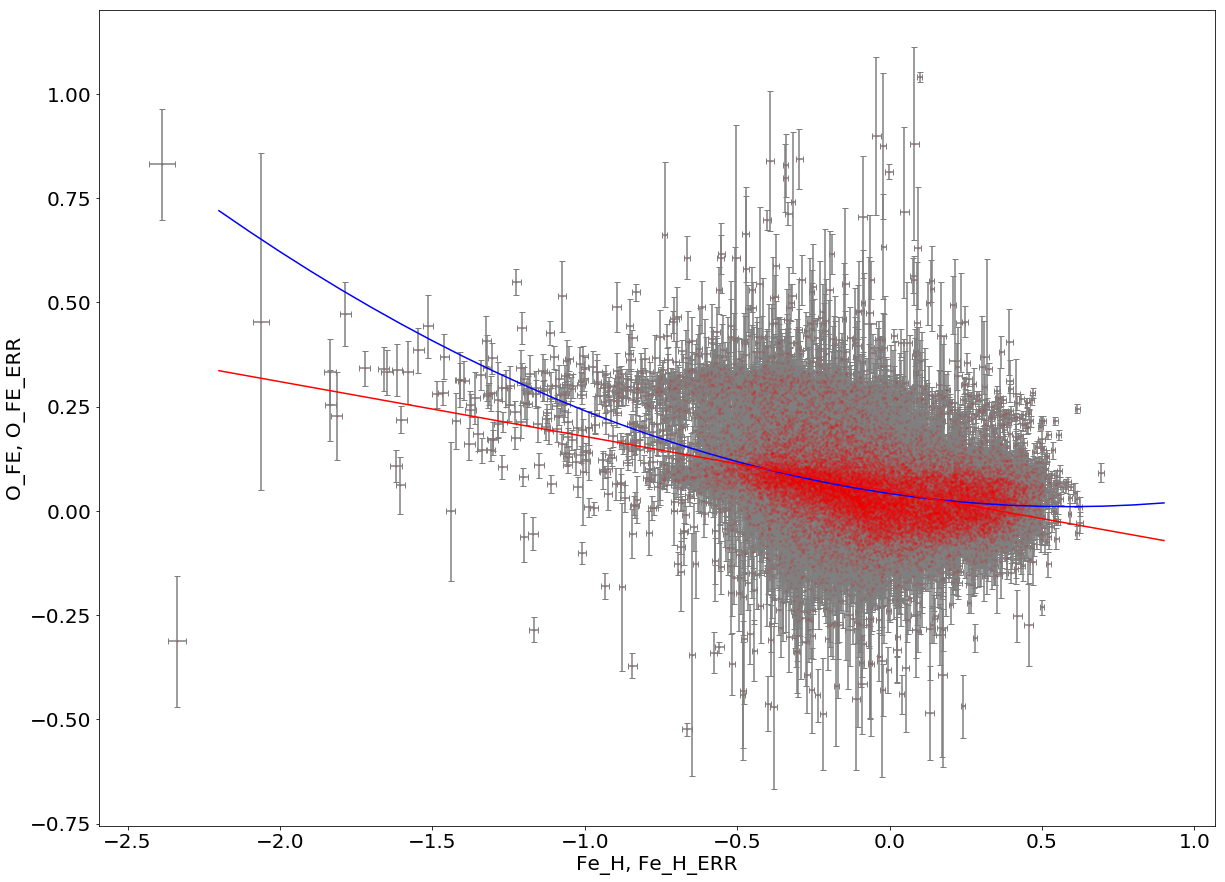

In [161]:
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
# print(star_hdus[1].columns)
star_hdus.close()


# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

F= star['Fe_H']
O= star['O_FE']

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > -2)&\
     (star['GLAT'] < 2)&\
     (F > -9000) & (O > -9000)&\
     (F < 300) &(O < 15000)

good = np.where(gd)[0]

p0=[10,100,1000]
popt,pcov = mcFit3param(poly2, star['Fe_H'][gd], star['O_FE'][gd], star['Fe_H_ERR'][gd],star['O_FE_ERR'][gd], p0)
popt1,pcov1 = mcFitLine(star['Fe_H'][gd], star['O_FE'][gd], star['Fe_H_ERR'][gd],star['O_FE_ERR'][gd])

#Plot details:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][gd],star['O_FE'][gd],s=3,c='r',alpha=0.1)
ax.errorbar(star['Fe_H'][gd],star['O_FE'][gd], xerr=star['Fe_H_ERR'][gd],yerr=star['O_FE_ERR'][gd],c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.xlabel("Fe_H, Fe_H_ERR",size=20)
plt.ylabel("O_FE, O_FE_ERR",size=20)


#Which function fits the data best:
#1
Fe_Hx = np.arange(-2.2,1,0.1)
ax.plot(Fe_Hx, poly2(Fe_Hx,*popt), c='b')
#2
Fe_Hx = np.arange(-2.2,1,0.1)
ax.plot(Fe_Hx, linear(Fe_Hx,*popt1), c='r')

#The best fit values of the parameter
print("The best fit values for Poly2")
print("Param 1",popt[0], pcov[0])
print("Param 2",popt[1], pcov[1])
print("Param 3",popt[2], pcov[2])

print("The best fit values for Linear")
print("Param 1",popt1[0], pcov1[0])
print("Param 2",popt1[1], pcov1[1])
plt.show()

## Plot d) Stars with $GLAT < -10$ OR $GLAT >$$10$

The best fit values for Poly2
Param 1 2.751334868222332e-08 2.423148041608799e-10
Param 2 -0.0005662428596629802 2.479779724518736e-06
Param 3 2.7301906210176994 0.006264875739194152


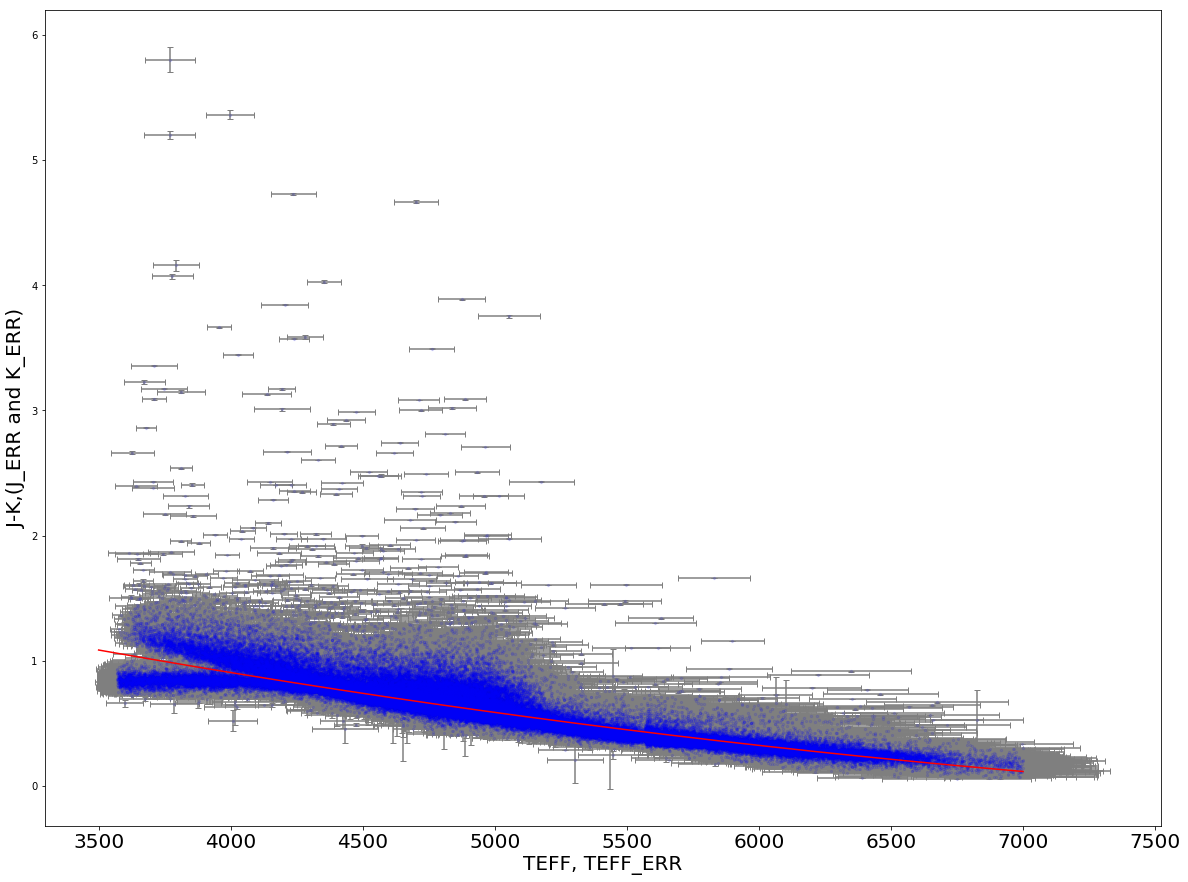

In [160]:
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
# print(star_hdus[1].columns)
star_hdus.close()


# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
T= star['TEFF']
L= star['J']-star['K'] 
L_ERR = star['J_ERR']-star['K_ERR']

gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > 10) &\
     (T > 2500) & (L > 0)&\
     (T < 7000) &(L < 1000)&\
     (L_ERR < 5) & (L_ERR > -5)
good = np.where(gd)[0]
gd1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < -10)&\
     (T > 2500) & (L > 0)&\
     (T < 7000) &(L < 1000)&\
     (L_ERR < 5) & (L_ERR > -5)
good = np.where(gd)[0]

#Plot details:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][gd],L[gd],s=5,c='b',alpha=0.1)
ax.scatter(star['TEFF'][gd1],L[gd1],s=6,c='b',alpha=0.1)
ax.errorbar(star['TEFF'][gd],L[gd], xerr=star['TEFF_ERR'][gd],yerr=L_ERR[gd],c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.errorbar(star['TEFF'][gd1],L[gd1], xerr=star['TEFF_ERR'][gd1],yerr=L_ERR[gd1],c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.xaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.xlabel("TEFF, TEFF_ERR",size=20)
plt.ylabel("J-K,(J_ERR and K_ERR)",size=20)

#Which function fits the data best:
p0=[10,100,1000]
popt,pcov = mcFit3param(poly2, star['TEFF'][gd], L[gd],star['TEFF_ERR'][gd],L_ERR[gd], p0)
TEFFx = np.arange(3500,7000,1)
ax.plot(TEFFx, poly2(TEFFx,*popt), c='r')


#The best fit values of the parameter
print("The best fit values for Poly2")
print("Param 1",popt[0], pcov[0])
print("Param 2",popt[1], pcov[1])
print("Param 3",popt[2], pcov[2])

plt.show()

## Plot e): stars with only $-10$$< GLAT <10$

The best fit values for the parameters
Param 1 51.49261257668283 0.00017315593947020896
Param 2 0.03147328129895464 8.538569725863216e-08
Param 3 -0.4383702897778064 1.3485160507327736e-05
Param 4 -13.695936123080447 0.00016644277199243717


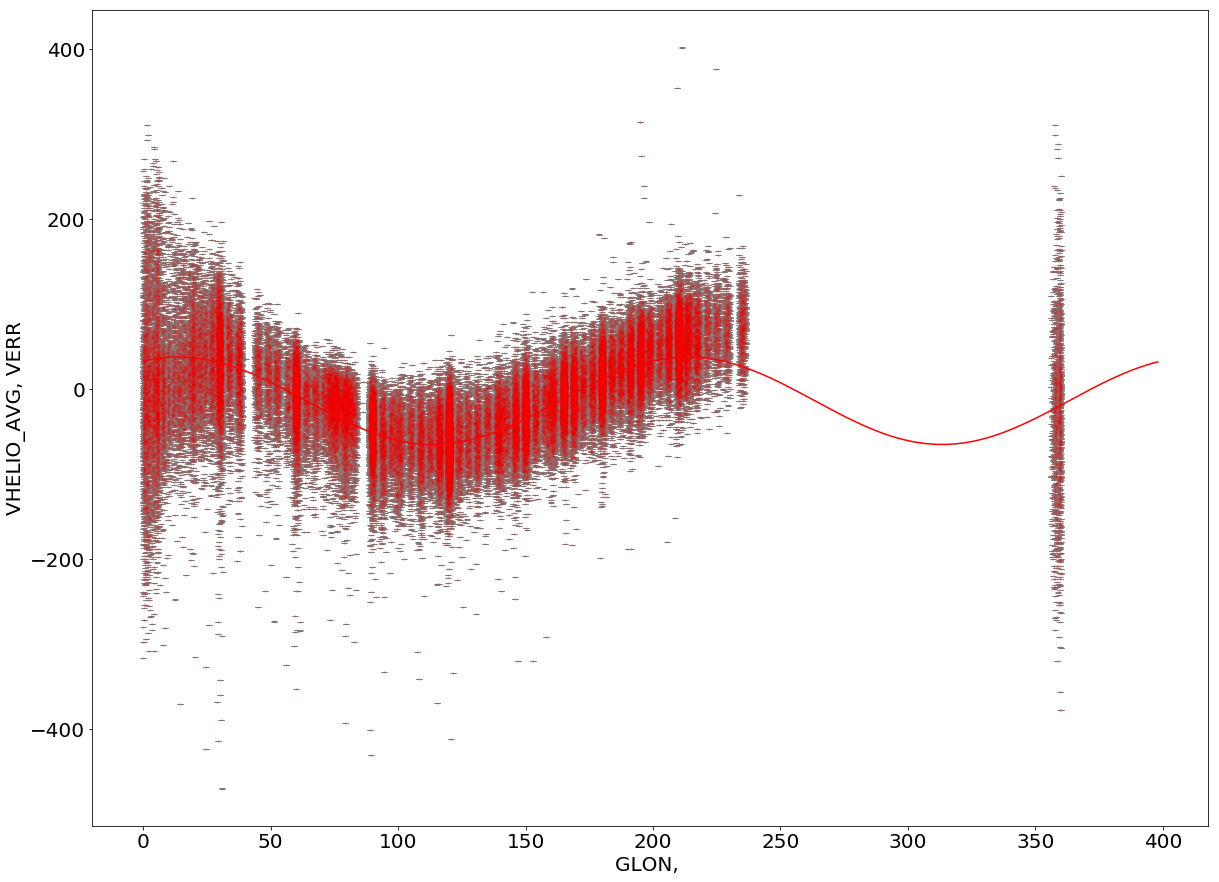

In [172]:
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
# print(star_hdus[1].columns)
star_hdus.close()


# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters


G= star['GLON']
V= star['VHELIO_AVG']

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > -10)&\
     (star['GLAT'] < 10)&\
     (F > -1000) & (O > -1000)&\
     (F < 500) &(O < 2000)


good = np.where(gd)[0]

#Plot details:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(G[gd],V[gd],s=3,c='r',alpha=0.1)
ax.errorbar(star['GLON'][gd],star['VHELIO_AVG'][gd],yerr=star['VERR'][gd],c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.xlabel("GLON, ",size=20)
plt.ylabel("VHELIO_AVG, VERR",size=20)

#Which function fits the data best:
p0=[300,np.pi/100,0,9]
popt, pcov = mcFit4param(cosfit,star['GLON'][gd],star['VHELIO_AVG'][gd],0,star['VERR'][gd],p0)
Glon = np.arange(0,400,2)
ax.plot(Glon, cosfit(Glon,*popt), c='r')

#The best fit values of the parameter
print("The best fit values for the parameters")
print("Param 1",popt[0], pcov[0])
print("Param 2",popt[1], pcov[1])
print("Param 3",popt[2], pcov[2])
print("Param 4",popt[3], pcov[3])
plt.show()

## Plot f ) NVISITS vs. VSCATTER

The best fit values for Poly2
Param 1 0.0021852984778533697 4.19023025257745e-05
Param 2 -0.10035365346223188 0.001249602949387932
Param 3 13.252484984419848 0.006198331482340266
The best fit values for Linear
Param 1 -0.043850284005332966 0.00034438590571577923
Param 2 13.070974860204865 0.0034291492697573985


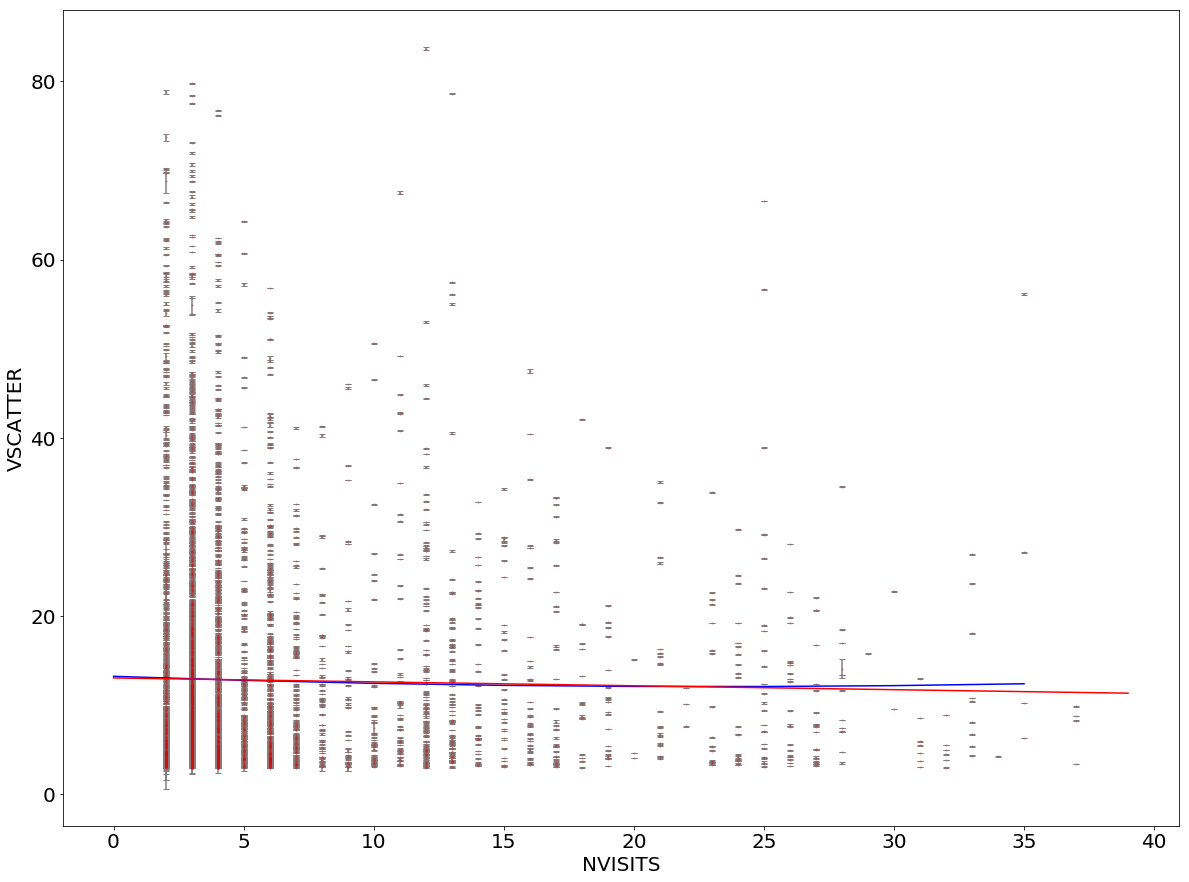

In [203]:
# READ IN FITS FILES

star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
# print(star_hdus[1].columns)
star_hdus.close()


# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters


G= star['NVISITS']
V= star['VSCATTER']

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (G > 0) & (V > 3)&\
     (G < 50) &(V < 85)


good = np.where(gd)[0]

#Plot details:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(G[gd],V[gd],s=3,c='r',alpha=0.1)
ax.errorbar(G[gd],V[gd],yerr=star['VERR'][gd],c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.xlabel("NVISITS",size=20)
plt.ylabel("VSCATTER",size=20)

p0=[1,51,13]
popt,pcov = mcFit3param(poly2, G[gd], V[gd],0,star['VERR'][gd], p0)
popt1,pcov1 = mcFitLine(G[gd], V[gd],0,star['VERR'][gd])

#Which function fits the data best:
#1
GV = np.arange(0,40,5)
ax.plot(GV, poly2(GV,*popt), c='b')
#2
GV = np.arange(0,40,1)
ax.plot(GV, linear(GV,*popt1), c='r')

#The best fit values of the parameter
print("The best fit values for Poly2")
print("Param 1",popt[0], pcov[0])
print("Param 2",popt[1], pcov[1])
print("Param 3",popt[2], pcov[2])

print("The best fit values for Linear")
print("Param 1",popt1[0], pcov1[0])
print("Param 2",popt1[1], pcov1[1])


plt.show()

## Plot g ) FE_H vs. NI_FE

The best fit values for Poly2
Param 1 0.0202749696298237 0.0006332621045098488
Param 2 -0.005976439587985337 0.0003786742104465764
Param 3 0.017986007649613653 6.982342527984887e-05
The best fit values for Linear
Param 1 -0.025369084862384275 0.00036160248775085716
Param 2 0.01807237272944979 6.422551952953647e-05


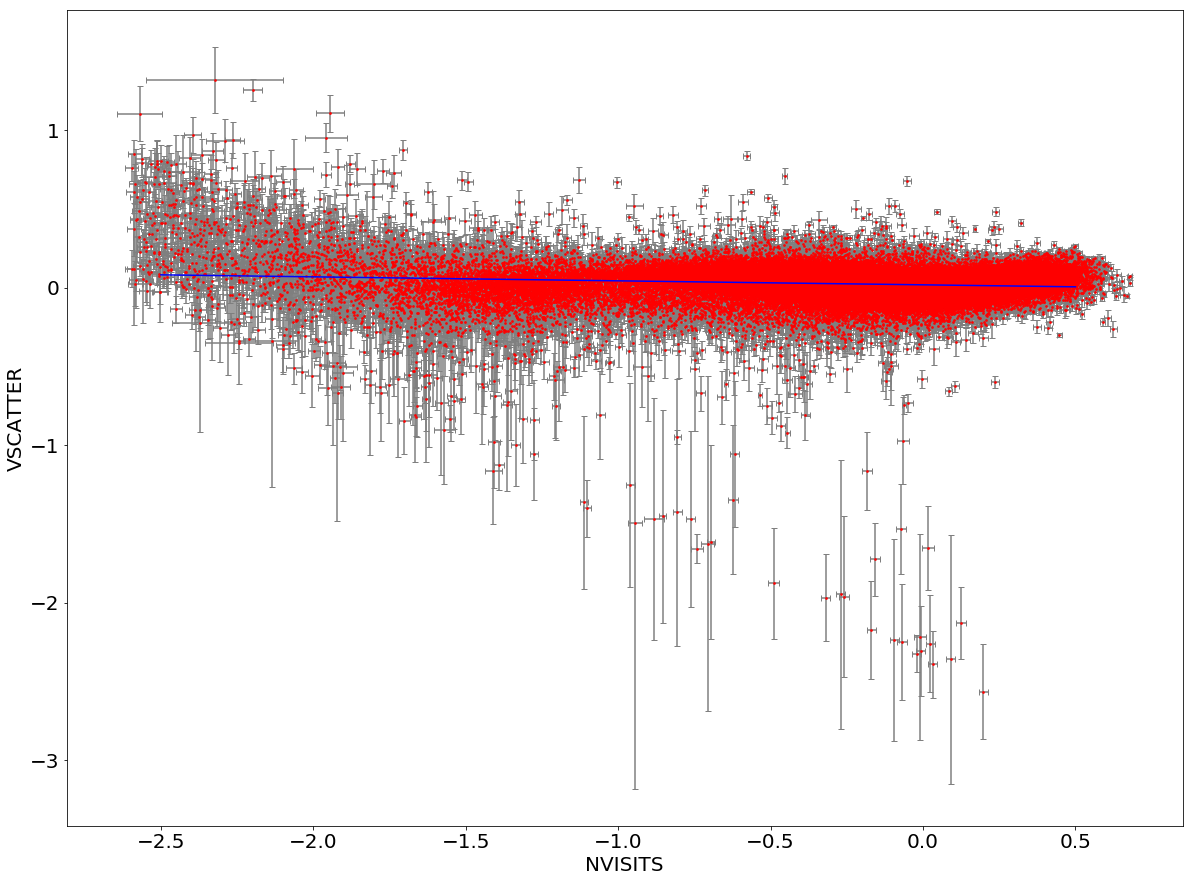

In [216]:
# READ IN FITS FILES

star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
# print(star_hdus[1].columns)
star_hdus.close()


# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters


F= star['FE_H']
N= star['NI_FE']

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&\
     (F > -9999) & (N > -9999)&\
     (F < 9999) &(N < 9999)


good = np.where(gd)[0]

#Plot details:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(F[gd],N[gd],s=3,c='r',alpha=0.9)
ax.errorbar(F[gd],N[gd],xerr=star['FE_H_ERR'][gd],yerr=star['NI_FE_ERR'][gd],c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.xlabel("NVISITS",size=20)
plt.ylabel("VSCATTER",size=20)

p0=[1,2,13]
popt,pcov = mcFit3param(poly2, F[gd], N[gd],star['FE_H_ERR'][gd],star['NI_FE_ERR'][gd], p0)
popt1,pcov1 = mcFitLine(F[gd], N[gd],star['FE_H_ERR'][gd],star['NI_FE_ERR'][gd])

#Which function fits the data best:
#1
FN = np.arange(-2.5,0.6,5)
ax.plot(FN, poly2(FN,*popt), c='b')
#2
FN = np.arange(-2.5,0.6,1)
ax.plot(FN, linear(FN,*popt1), c='b')

#The best fit values of the parameter
print("The best fit values for Poly2")
print("Param 1",popt[0], pcov[0])
print("Param 2",popt[1], pcov[1])
print("Param 3",popt[2], pcov[2])

print("The best fit values for Linear")
print("Param 1",popt1[0], pcov1[0])
print("Param 2",popt1[1], pcov1[1])


plt.show()